# Out-of-sample forecasting experiments

I conduct out-of-sample forecasting experiments to understand what kind of text data (topics, sentiment, or uncertainty) helps improve forecasts of three quarterly variables (GDP, Investment, and Consumption) more.

In this notebook, I evaluate the performance of dynamic factor models (DFM) using hard data and survey information. I forecast Investment growth and establish a benchmark model without the use of text data.

## Experiment Details

- **Data Sources:** Hard data and surveys.
- **Forecast Target:** Investment growth.
- **Model:** Dynamic Factor Models (DFM).
- **Parameters Explored:**
  - **Number of Global Factors:** 1 to 3
  - **Factor Order:** 1 to 3 (for each number of factors)

In [1]:
import os
import time
import datetime
import pandas as pd
import DFM_function_update

# Define inputs common to all models
q_var = 'Investment'               # quarterly variable being forecasted
additional_factors = None          # or "all" or e.g. ['Labor market']
start = '1991-04'

# Generate list of forecast_month strings for quarters from 2008Q1 to 2018Q4
# forecast_month is set to the month corresponding to quarter-end:
# Q1: 'YYYY-03', Q2: 'YYYY-06', Q3: 'YYYY-09', Q4: 'YYYY-12'
forecast_months = []
for year in range(2008, 2019):
    forecast_months.extend([f"{year}-03", f"{year}-06", f"{year}-09", f"{year}-12"])
    
# Define the vintage column names 
vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]

# Create directories to save forecasts and MSE results
os.makedirs(f"../forecasts/DFM_hard_surveys_global_factors_{q_var}_update", exist_ok=True)
os.makedirs(f"../MSE/DFM_hard_surveys_global_factors_{q_var}_update", exist_ok=True)

# Load the actual growth data
actual_growth_file = f"../{q_var}_growth_actual_update.csv"
actual_growth = pd.read_csv(actual_growth_file)

# Record overall start time
overall_start = time.time()

# Loop over the number of factors and factor order values from 1 to 3
for num_factors in range(1, 4):  # Varying number of Global factors: 1, 2, 3
    for order in range(1, 4):    # Varying factor order: 1, 2, 3
        
        # Define model-specific parameters
        factor_multiplicities = {'Global': num_factors}
        factor_orders = {'Global': order}

        # Prepare lists to store each quarter's forecasts and row labels
        forecasts_all_quarters = []
        row_labels = []
        
        # Start timing for this model
        start_time = time.time()

        # Loop over each forecast month, get the forecasts, and store the results
        for fm in forecast_months:
            # Use the forecast_month string as the row label
            row_labels.append(fm)

            # Run the forecast function for this quarter
            forecasts_dict = DFM_function_update.get_forecasts(
                forecast_month = fm,
                q_var = q_var,
                additional_factors = additional_factors,
                factor_multiplicities = factor_multiplicities,
                factor_orders = factor_orders,
                start = start
            )

            # Obtain the correct ordering of vintages
            vintages_order = DFM_function_update.vintage_dates(fm)
            # Extract the forecast value for each vintage in that order
            quarter_forecasts = [forecasts_dict[vint] for vint in vintages_order]
            forecasts_all_quarters.append(quarter_forecasts)

        # Create a DataFrame with rows labeled by the forecast_month strings and columns as vintage names
        results = pd.DataFrame(forecasts_all_quarters, index=row_labels, columns=vintage_col_names)
        
        # Stop timing for this model and print elapsed time
        elapsed = time.time() - start_time
        elapsed_time = datetime.timedelta(seconds=elapsed)
        print(f"Model with Global factors = {num_factors} and order = {order} estimated in {elapsed_time}.")

        # Construct the output file name
        factors_str = "_".join([
            f"{factor.replace(' ', '_')}_{factor_multiplicities[factor]}_{factor_orders[factor]}"
            for factor in factor_multiplicities])
        file_name = f"forecasts_{q_var}_{factors_str}.csv"

        # Save the CSV file in a subfolder 
        output_path = os.path.join(f"../forecasts/DFM_hard_surveys_global_factors_{q_var}_update", file_name)
        results.to_csv(output_path, index=True)
        
        # ----- MSE Calculation -----
        # Load forecasts
        forecasts = pd.read_csv(output_path, index_col=0)
        # Make sure the index is a column named "date"
        forecasts.index.name = "date"
        forecasts.reset_index(inplace=True)

        # Merge dfs by date 
        merged = pd.merge(forecasts, actual_growth, on="date", how="inner")

        # Calculate the Mean Squared Error (MSE) for each vintage column
        mse_dict = {}
        for col in vintage_col_names:
            mse = ((merged[col] - merged["growth"]) ** 2).mean()
            mse_dict[col] = mse

        # Create a df with one row (the MSE values for each forecasting horizon)
        mse_df = pd.DataFrame(mse_dict, index=[0])

        # Save MSE results to CSV
        mse_file_name = f"MSE_{q_var}_{factors_str}.csv"
        mse_output_path = os.path.join(f"../MSE/DFM_hard_surveys_global_factors_{q_var}_update", mse_file_name)
        mse_df.to_csv(mse_output_path, index=False)
        
# Stop overall timing and print overall elapsed time
overall_elapsed = time.time() - overall_start
overall_elapsed_time = datetime.timedelta(seconds=overall_elapsed)
print(f"Overall time taken for running all models: {overall_elapsed_time}.")

EM start iterations, llf=-9179.1
EM converged at iteration 40, llf=-8982.5, convergence criterion=9.8383e-07 < tolerance=1e-06
EM start iterations, llf=-9192
EM converged at iteration 41, llf=-8994.8, convergence criterion=9.7348e-07 < tolerance=1e-06
EM start iterations, llf=-9231.5
EM converged at iteration 41, llf=-9031.7, convergence criterion=9.7392e-07 < tolerance=1e-06
EM start iterations, llf=-9238.3
EM converged at iteration 42, llf=-9038.8, convergence criterion=9.6788e-07 < tolerance=1e-06
EM start iterations, llf=-9287.9
EM converged at iteration 40, llf=-9083.3, convergence criterion=9.6933e-07 < tolerance=1e-06
EM start iterations, llf=-9296.2
EM converged at iteration 39, llf=-9090.4, convergence criterion=9.9727e-07 < tolerance=1e-06
EM start iterations, llf=-9337.6
EM converged at iteration 40, llf=-9133.2, convergence criterion=9.6034e-07 < tolerance=1e-06
EM start iterations, llf=-9337.6
EM converged at iteration 40, llf=-9133.2, convergence criterion=9.6034e-07 < to

EM converged at iteration 30, llf=-10390, convergence criterion=9.7761e-07 < tolerance=1e-06
EM start iterations, llf=-10560
EM converged at iteration 30, llf=-10417, convergence criterion=9.8193e-07 < tolerance=1e-06
EM start iterations, llf=-10606
EM converged at iteration 26, llf=-10471, convergence criterion=9.7153e-07 < tolerance=1e-06
EM start iterations, llf=-10613
EM converged at iteration 31, llf=-10476, convergence criterion=9.5372e-07 < tolerance=1e-06
EM start iterations, llf=-10652
EM converged at iteration 33, llf=-10511, convergence criterion=9.6522e-07 < tolerance=1e-06
EM start iterations, llf=-10652
EM converged at iteration 33, llf=-10511, convergence criterion=9.6522e-07 < tolerance=1e-06
EM start iterations, llf=-10664
EM converged at iteration 35, llf=-10524, convergence criterion=9.4461e-07 < tolerance=1e-06
EM start iterations, llf=-10701
EM converged at iteration 33, llf=-10563, convergence criterion=9.7293e-07 < tolerance=1e-06
EM start iterations, llf=-10707


EM start iterations, llf=-11889
EM converged at iteration 34, llf=-11740, convergence criterion=9.6503e-07 < tolerance=1e-06
EM start iterations, llf=-11923
EM converged at iteration 35, llf=-11771, convergence criterion=9.7139e-07 < tolerance=1e-06
EM start iterations, llf=-11923
EM converged at iteration 35, llf=-11771, convergence criterion=9.7139e-07 < tolerance=1e-06
EM start iterations, llf=-11932
EM converged at iteration 35, llf=-11780, convergence criterion=9.7099e-07 < tolerance=1e-06
EM start iterations, llf=-11972
EM converged at iteration 35, llf=-11821, convergence criterion=9.4266e-07 < tolerance=1e-06
EM start iterations, llf=-11983
EM converged at iteration 35, llf=-11832, convergence criterion=9.3751e-07 < tolerance=1e-06
EM start iterations, llf=-12020
EM converged at iteration 34, llf=-11868, convergence criterion=9.775e-07 < tolerance=1e-06
EM start iterations, llf=-12027
EM converged at iteration 34, llf=-11875, convergence criterion=9.5849e-07 < tolerance=1e-06
E

EM start iterations, llf=-13223
EM converged at iteration 34, llf=-13047, convergence criterion=9.3815e-07 < tolerance=1e-06
EM start iterations, llf=-13267
EM converged at iteration 34, llf=-13089, convergence criterion=9.2675e-07 < tolerance=1e-06
EM start iterations, llf=-13272
EM converged at iteration 34, llf=-13094, convergence criterion=9.2696e-07 < tolerance=1e-06
EM start iterations, llf=-13312
EM converged at iteration 34, llf=-13134, convergence criterion=9.1292e-07 < tolerance=1e-06
EM start iterations, llf=-13319
EM converged at iteration 34, llf=-13140, convergence criterion=9.1973e-07 < tolerance=1e-06
EM start iterations, llf=-13362
EM converged at iteration 34, llf=-13184, convergence criterion=9.1415e-07 < tolerance=1e-06
EM start iterations, llf=-13362
EM converged at iteration 34, llf=-13184, convergence criterion=9.1415e-07 < tolerance=1e-06
EM start iterations, llf=-13371
EM converged at iteration 33, llf=-13193, convergence criterion=9.8819e-07 < tolerance=1e-06


EM start iterations, llf=-14415
EM converged at iteration 28, llf=-14228, convergence criterion=9.5178e-07 < tolerance=1e-06
EM start iterations, llf=-14421
EM converged at iteration 28, llf=-14234, convergence criterion=9.5567e-07 < tolerance=1e-06
EM start iterations, llf=-14467
EM converged at iteration 28, llf=-14278, convergence criterion=9.5572e-07 < tolerance=1e-06
EM start iterations, llf=-14467
EM converged at iteration 28, llf=-14278, convergence criterion=9.5572e-07 < tolerance=1e-06
EM start iterations, llf=-14472
EM converged at iteration 28, llf=-14284, convergence criterion=9.561e-07 < tolerance=1e-06
EM start iterations, llf=-14512
EM converged at iteration 28, llf=-14322, convergence criterion=9.8277e-07 < tolerance=1e-06
EM start iterations, llf=-14518
EM converged at iteration 28, llf=-14329, convergence criterion=9.8293e-07 < tolerance=1e-06
EM start iterations, llf=-14561
EM converged at iteration 28, llf=-14370, convergence criterion=9.8722e-07 < tolerance=1e-06
E

EM start iterations, llf=-9615
EM converged at iteration 56, llf=-9394.8, convergence criterion=9.9266e-07 < tolerance=1e-06
EM start iterations, llf=-9615
EM converged at iteration 56, llf=-9394.8, convergence criterion=9.9266e-07 < tolerance=1e-06
EM start iterations, llf=-9598.1
EM converged at iteration 56, llf=-9374.5, convergence criterion=9.9287e-07 < tolerance=1e-06
EM start iterations, llf=-9638.3
EM converged at iteration 58, llf=-9427.4, convergence criterion=9.8535e-07 < tolerance=1e-06
EM start iterations, llf=-9656.5
EM converged at iteration 57, llf=-9452.5, convergence criterion=9.8351e-07 < tolerance=1e-06
EM start iterations, llf=-9708.7
EM converged at iteration 60, llf=-9527.2, convergence criterion=9.7694e-07 < tolerance=1e-06
EM start iterations, llf=-9707.9
EM converged at iteration 60, llf=-9524.3, convergence criterion=9.7891e-07 < tolerance=1e-06
EM start iterations, llf=-9718.3
EM converged at iteration 57, llf=-9542.1, convergence criterion=9.7286e-07 < tole

EM start iterations, llf=-10985
EM converged at iteration 63, llf=-10842, convergence criterion=9.9293e-07 < tolerance=1e-06
EM start iterations, llf=-10992
EM converged at iteration 59, llf=-10844, convergence criterion=9.759e-07 < tolerance=1e-06
EM start iterations, llf=-11018
EM converged at iteration 57, llf=-10862, convergence criterion=9.9655e-07 < tolerance=1e-06
EM start iterations, llf=-11023
EM converged at iteration 60, llf=-10874, convergence criterion=9.9777e-07 < tolerance=1e-06
EM start iterations, llf=-11059
EM converged at iteration 67, llf=-10917, convergence criterion=9.8935e-07 < tolerance=1e-06
EM start iterations, llf=-11059
EM converged at iteration 67, llf=-10917, convergence criterion=9.8935e-07 < tolerance=1e-06
EM start iterations, llf=-11070
EM converged at iteration 67, llf=-10928, convergence criterion=9.953e-07 < tolerance=1e-06
EM start iterations, llf=-11110
EM converged at iteration 65, llf=-10968, convergence criterion=9.9065e-07 < tolerance=1e-06
EM

EM start iterations, llf=-12317
EM converged at iteration 52, llf=-12157, convergence criterion=9.7582e-07 < tolerance=1e-06
EM start iterations, llf=-12357
EM converged at iteration 50, llf=-12193, convergence criterion=9.886e-07 < tolerance=1e-06
EM start iterations, llf=-12357
EM converged at iteration 50, llf=-12193, convergence criterion=9.886e-07 < tolerance=1e-06
EM start iterations, llf=-12365
EM converged at iteration 50, llf=-12201, convergence criterion=9.7183e-07 < tolerance=1e-06
EM start iterations, llf=-12405
EM converged at iteration 51, llf=-12239, convergence criterion=9.7725e-07 < tolerance=1e-06
EM start iterations, llf=-12407
EM converged at iteration 51, llf=-12241, convergence criterion=9.8124e-07 < tolerance=1e-06
EM start iterations, llf=-12450
EM converged at iteration 51, llf=-12283, convergence criterion=9.9905e-07 < tolerance=1e-06
EM start iterations, llf=-12455
EM converged at iteration 51, llf=-12287, convergence criterion=9.975e-07 < tolerance=1e-06
EM 

EM start iterations, llf=-13670
EM converged at iteration 42, llf=-13497, convergence criterion=9.9116e-07 < tolerance=1e-06
EM start iterations, llf=-13708
EM converged at iteration 43, llf=-13535, convergence criterion=9.696e-07 < tolerance=1e-06
EM start iterations, llf=-13713
EM converged at iteration 43, llf=-13540, convergence criterion=9.7039e-07 < tolerance=1e-06
EM start iterations, llf=-13755
EM converged at iteration 42, llf=-13581, convergence criterion=9.9125e-07 < tolerance=1e-06
EM start iterations, llf=-13763
EM converged at iteration 42, llf=-13587, convergence criterion=9.9521e-07 < tolerance=1e-06
EM start iterations, llf=-13798
EM converged at iteration 42, llf=-13622, convergence criterion=9.8872e-07 < tolerance=1e-06
EM start iterations, llf=-13798
EM converged at iteration 42, llf=-13622, convergence criterion=9.8872e-07 < tolerance=1e-06
EM start iterations, llf=-13817
EM converged at iteration 42, llf=-13642, convergence criterion=9.9519e-07 < tolerance=1e-06
E

EM start iterations, llf=-14841
EM converged at iteration 44, llf=-14641, convergence criterion=9.771e-07 < tolerance=1e-06
EM start iterations, llf=-14852
EM converged at iteration 44, llf=-14653, convergence criterion=9.7322e-07 < tolerance=1e-06
EM start iterations, llf=-14889
EM converged at iteration 43, llf=-14691, convergence criterion=9.8535e-07 < tolerance=1e-06
EM start iterations, llf=-14889
EM converged at iteration 43, llf=-14691, convergence criterion=9.8535e-07 < tolerance=1e-06
EM start iterations, llf=-14896
EM converged at iteration 43, llf=-14700, convergence criterion=9.8265e-07 < tolerance=1e-06
EM start iterations, llf=-14940
EM converged at iteration 43, llf=-14743, convergence criterion=9.8109e-07 < tolerance=1e-06
EM start iterations, llf=-14948
EM converged at iteration 43, llf=-14751, convergence criterion=9.7993e-07 < tolerance=1e-06
EM start iterations, llf=-14987
EM converged at iteration 43, llf=-14789, convergence criterion=9.7795e-07 < tolerance=1e-06
E

EM start iterations, llf=-10010
EM converged at iteration 59, llf=-9848.3, convergence criterion=9.854e-07 < tolerance=1e-06
EM start iterations, llf=-10010
EM converged at iteration 59, llf=-9848.3, convergence criterion=9.854e-07 < tolerance=1e-06
EM start iterations, llf=-10016
EM converged at iteration 59, llf=-9854.6, convergence criterion=9.797e-07 < tolerance=1e-06
EM start iterations, llf=-10053
EM converged at iteration 58, llf=-9889.1, convergence criterion=9.8983e-07 < tolerance=1e-06
EM start iterations, llf=-10060
EM converged at iteration 58, llf=-9896.2, convergence criterion=9.9218e-07 < tolerance=1e-06
EM start iterations, llf=-10092
EM converged at iteration 55, llf=-9921.9, convergence criterion=9.7957e-07 < tolerance=1e-06
EM start iterations, llf=-10103
EM converged at iteration 54, llf=-9931.9, convergence criterion=9.9457e-07 < tolerance=1e-06
EM start iterations, llf=-10150
EM converged at iteration 57, llf=-9986.8, convergence criterion=9.9956e-07 < tolerance=1

EM start iterations, llf=-11391
EM converged at iteration 58, llf=-11244, convergence criterion=9.7377e-07 < tolerance=1e-06
EM start iterations, llf=-11396
EM converged at iteration 58, llf=-11250, convergence criterion=9.7834e-07 < tolerance=1e-06
EM start iterations, llf=-11443
EM converged at iteration 59, llf=-11300, convergence criterion=9.7793e-07 < tolerance=1e-06
EM start iterations, llf=-11452
EM converged at iteration 58, llf=-11305, convergence criterion=9.8633e-07 < tolerance=1e-06
EM start iterations, llf=-11494
EM converged at iteration 59, llf=-11349, convergence criterion=9.9661e-07 < tolerance=1e-06
EM start iterations, llf=-11494
EM converged at iteration 59, llf=-11349, convergence criterion=9.9661e-07 < tolerance=1e-06
EM start iterations, llf=-11502
EM converged at iteration 59, llf=-11356, convergence criterion=9.6603e-07 < tolerance=1e-06
EM start iterations, llf=-11544
EM converged at iteration 58, llf=-11397, convergence criterion=9.9048e-07 < tolerance=1e-06


EM start iterations, llf=-12740
EM converged at iteration 54, llf=-12575, convergence criterion=9.7327e-07 < tolerance=1e-06
EM start iterations, llf=-12784
EM converged at iteration 54, llf=-12618, convergence criterion=9.6991e-07 < tolerance=1e-06
EM start iterations, llf=-12784
EM converged at iteration 54, llf=-12618, convergence criterion=9.6991e-07 < tolerance=1e-06
EM start iterations, llf=-12793
EM converged at iteration 54, llf=-12627, convergence criterion=9.7074e-07 < tolerance=1e-06
EM start iterations, llf=-12833
EM converged at iteration 53, llf=-12666, convergence criterion=9.9843e-07 < tolerance=1e-06
EM start iterations, llf=-12842
EM converged at iteration 53, llf=-12675, convergence criterion=9.956e-07 < tolerance=1e-06
EM start iterations, llf=-12879
EM converged at iteration 53, llf=-12712, convergence criterion=9.9278e-07 < tolerance=1e-06
EM start iterations, llf=-12887
EM converged at iteration 53, llf=-12719, convergence criterion=9.9181e-07 < tolerance=1e-06
E

EM start iterations, llf=-14088
EM converged at iteration 48, llf=-13907, convergence criterion=9.9496e-07 < tolerance=1e-06
EM start iterations, llf=-14125
EM converged at iteration 48, llf=-13945, convergence criterion=9.9677e-07 < tolerance=1e-06
EM start iterations, llf=-14131
EM converged at iteration 48, llf=-13953, convergence criterion=9.9295e-07 < tolerance=1e-06
EM start iterations, llf=-14171
EM converged at iteration 49, llf=-13991, convergence criterion=9.6873e-07 < tolerance=1e-06
EM start iterations, llf=-14178
EM converged at iteration 49, llf=-13998, convergence criterion=9.6907e-07 < tolerance=1e-06
EM start iterations, llf=-14219
EM converged at iteration 49, llf=-14039, convergence criterion=9.7507e-07 < tolerance=1e-06
EM start iterations, llf=-14219
EM converged at iteration 49, llf=-14039, convergence criterion=9.7507e-07 < tolerance=1e-06
EM start iterations, llf=-14224
EM converged at iteration 49, llf=-14042, convergence criterion=9.7688e-07 < tolerance=1e-06


EM start iterations, llf=-14985
EM converged at iteration 49, llf=-14784, convergence criterion=9.8669e-07 < tolerance=1e-06
EM start iterations, llf=-14990
EM converged at iteration 49, llf=-14788, convergence criterion=9.8482e-07 < tolerance=1e-06
EM start iterations, llf=-15030
EM converged at iteration 49, llf=-14829, convergence criterion=9.8198e-07 < tolerance=1e-06
Model with Global factors = 1 and order = 3 estimated in 1:19:51.114114.
EM start iterations, llf=-8699.8
EM converged at iteration 41, llf=-8597.6, convergence criterion=9.7836e-07 < tolerance=1e-06
EM start iterations, llf=-8712.6
EM converged at iteration 41, llf=-8610.2, convergence criterion=9.7042e-07 < tolerance=1e-06
EM start iterations, llf=-8750.7
EM converged at iteration 40, llf=-8648.6, convergence criterion=9.8168e-07 < tolerance=1e-06
EM start iterations, llf=-8758.6
EM converged at iteration 40, llf=-8656.5, convergence criterion=9.8231e-07 < tolerance=1e-06
EM start iterations, llf=-8801.2
EM converge

EM converged at iteration 27, llf=-9716.6, convergence criterion=9.5599e-07 < tolerance=1e-06
EM start iterations, llf=-9851.5
EM converged at iteration 28, llf=-9745, convergence criterion=9.4266e-07 < tolerance=1e-06
EM start iterations, llf=-9851.5
EM converged at iteration 28, llf=-9745, convergence criterion=9.4266e-07 < tolerance=1e-06
EM start iterations, llf=-9864.4
EM converged at iteration 27, llf=-9757.4, convergence criterion=9.4386e-07 < tolerance=1e-06
EM start iterations, llf=-9886.9
EM converged at iteration 27, llf=-9779.6, convergence criterion=9.9525e-07 < tolerance=1e-06
EM start iterations, llf=-9893.5
EM converged at iteration 28, llf=-9783.1, convergence criterion=9.8647e-07 < tolerance=1e-06
EM start iterations, llf=-9936.4
EM converged at iteration 28, llf=-9819.4, convergence criterion=9.9431e-07 < tolerance=1e-06
EM start iterations, llf=-9941.7
EM converged at iteration 27, llf=-9827.5, convergence criterion=9.9898e-07 < tolerance=1e-06
EM start iterations, 

EM start iterations, llf=-11059
EM converged at iteration 23, llf=-10942, convergence criterion=9.3088e-07 < tolerance=1e-06
EM start iterations, llf=-11093
EM converged at iteration 23, llf=-10977, convergence criterion=9.3173e-07 < tolerance=1e-06
EM start iterations, llf=-11105
EM converged at iteration 22, llf=-10986, convergence criterion=9.7764e-07 < tolerance=1e-06
EM start iterations, llf=-11145
EM converged at iteration 22, llf=-11027, convergence criterion=9.8544e-07 < tolerance=1e-06
EM start iterations, llf=-11153
EM converged at iteration 22, llf=-11035, convergence criterion=9.8158e-07 < tolerance=1e-06
EM start iterations, llf=-11188
EM converged at iteration 23, llf=-11070, convergence criterion=9.456e-07 < tolerance=1e-06
EM start iterations, llf=-11188
EM converged at iteration 23, llf=-11070, convergence criterion=9.456e-07 < tolerance=1e-06
EM start iterations, llf=-11195
EM converged at iteration 23, llf=-11079, convergence criterion=9.5739e-07 < tolerance=1e-06
EM

EM start iterations, llf=-12378
EM converged at iteration 19, llf=-12256, convergence criterion=9.5445e-07 < tolerance=1e-06
EM start iterations, llf=-12386
EM converged at iteration 19, llf=-12264, convergence criterion=9.4739e-07 < tolerance=1e-06
EM start iterations, llf=-12417
EM converged at iteration 19, llf=-12295, convergence criterion=9.5794e-07 < tolerance=1e-06
EM start iterations, llf=-12417
EM converged at iteration 19, llf=-12295, convergence criterion=9.5794e-07 < tolerance=1e-06
EM start iterations, llf=-12431
EM converged at iteration 19, llf=-12309, convergence criterion=9.5398e-07 < tolerance=1e-06
EM start iterations, llf=-12474
EM converged at iteration 19, llf=-12353, convergence criterion=9.9288e-07 < tolerance=1e-06
EM start iterations, llf=-12476
EM converged at iteration 20, llf=-12356, convergence criterion=9.2036e-07 < tolerance=1e-06
EM start iterations, llf=-12516
EM converged at iteration 20, llf=-12395, convergence criterion=9.1403e-07 < tolerance=1e-06


EM start iterations, llf=-13456
EM converged at iteration 19, llf=-13335, convergence criterion=9.7501e-07 < tolerance=1e-06
EM start iterations, llf=-13462
EM converged at iteration 19, llf=-13340, convergence criterion=9.3529e-07 < tolerance=1e-06
EM start iterations, llf=-13498
EM converged at iteration 19, llf=-13376, convergence criterion=9.2215e-07 < tolerance=1e-06
EM start iterations, llf=-13511
EM converged at iteration 19, llf=-13389, convergence criterion=9.147e-07 < tolerance=1e-06
EM start iterations, llf=-13555
EM converged at iteration 19, llf=-13432, convergence criterion=8.9996e-07 < tolerance=1e-06
EM start iterations, llf=-13561
EM converged at iteration 19, llf=-13437, convergence criterion=8.9922e-07 < tolerance=1e-06
EM start iterations, llf=-13603
EM converged at iteration 18, llf=-13479, convergence criterion=9.5803e-07 < tolerance=1e-06
EM start iterations, llf=-13603
EM converged at iteration 18, llf=-13479, convergence criterion=9.5803e-07 < tolerance=1e-06
E

EM start iterations, llf=-9008.5
EM converged at iteration 59, llf=-8902.1, convergence criterion=9.7766e-07 < tolerance=1e-06
EM start iterations, llf=-9019.1
EM converged at iteration 62, llf=-8912.6, convergence criterion=9.8909e-07 < tolerance=1e-06
EM start iterations, llf=-9043
EM converged at iteration 60, llf=-8937.7, convergence criterion=9.9993e-07 < tolerance=1e-06
EM start iterations, llf=-9046.2
EM converged at iteration 61, llf=-8939.5, convergence criterion=9.9234e-07 < tolerance=1e-06
EM start iterations, llf=-9099.5
EM converged at iteration 54, llf=-8993.5, convergence criterion=9.8224e-07 < tolerance=1e-06
EM start iterations, llf=-9099.5
EM converged at iteration 54, llf=-8993.5, convergence criterion=9.8224e-07 < tolerance=1e-06
EM start iterations, llf=-9111.5
EM converged at iteration 58, llf=-9007.1, convergence criterion=9.8258e-07 < tolerance=1e-06
EM start iterations, llf=-9164.2
EM converged at iteration 72, llf=-9065.7, convergence criterion=9.8214e-07 < to

EM start iterations, llf=-10199
EM converged at iteration 37, llf=-10082, convergence criterion=9.7344e-07 < tolerance=1e-06
EM start iterations, llf=-10207
EM converged at iteration 36, llf=-10091, convergence criterion=9.9349e-07 < tolerance=1e-06
EM start iterations, llf=-10241
EM converged at iteration 36, llf=-10123, convergence criterion=9.6968e-07 < tolerance=1e-06
EM start iterations, llf=-10241
EM converged at iteration 36, llf=-10123, convergence criterion=9.6968e-07 < tolerance=1e-06
EM start iterations, llf=-10250
EM converged at iteration 35, llf=-10134, convergence criterion=9.9633e-07 < tolerance=1e-06
EM start iterations, llf=-10284
EM converged at iteration 36, llf=-10167, convergence criterion=9.8674e-07 < tolerance=1e-06
EM start iterations, llf=-10293
EM converged at iteration 37, llf=-10177, convergence criterion=9.9574e-07 < tolerance=1e-06
EM start iterations, llf=-10325
EM converged at iteration 37, llf=-10208, convergence criterion=9.8562e-07 < tolerance=1e-06


EM start iterations, llf=-11455
EM converged at iteration 28, llf=-11338, convergence criterion=9.9597e-07 < tolerance=1e-06
EM start iterations, llf=-11467
EM converged at iteration 28, llf=-11350, convergence criterion=9.8243e-07 < tolerance=1e-06
EM start iterations, llf=-11504
EM converged at iteration 28, llf=-11387, convergence criterion=9.9178e-07 < tolerance=1e-06
EM start iterations, llf=-11513
EM converged at iteration 28, llf=-11396, convergence criterion=9.8644e-07 < tolerance=1e-06
EM start iterations, llf=-11552
EM converged at iteration 27, llf=-11436, convergence criterion=9.9205e-07 < tolerance=1e-06
EM start iterations, llf=-11559
EM converged at iteration 27, llf=-11442, convergence criterion=9.9002e-07 < tolerance=1e-06
EM start iterations, llf=-11591
EM converged at iteration 27, llf=-11476, convergence criterion=9.5387e-07 < tolerance=1e-06
EM start iterations, llf=-11591
EM converged at iteration 27, llf=-11476, convergence criterion=9.5387e-07 < tolerance=1e-06


EM start iterations, llf=-12743
EM converged at iteration 22, llf=-12620, convergence criterion=9.7833e-07 < tolerance=1e-06
EM start iterations, llf=-12784
EM converged at iteration 22, llf=-12660, convergence criterion=9.9119e-07 < tolerance=1e-06
EM start iterations, llf=-12792
EM converged at iteration 22, llf=-12669, convergence criterion=9.881e-07 < tolerance=1e-06
EM start iterations, llf=-12828
EM converged at iteration 23, llf=-12706, convergence criterion=9.4542e-07 < tolerance=1e-06
EM start iterations, llf=-12828
EM converged at iteration 23, llf=-12706, convergence criterion=9.4542e-07 < tolerance=1e-06
EM start iterations, llf=-12837
EM converged at iteration 23, llf=-12713, convergence criterion=9.4429e-07 < tolerance=1e-06
EM start iterations, llf=-12872
EM converged at iteration 23, llf=-12748, convergence criterion=9.4509e-07 < tolerance=1e-06
EM start iterations, llf=-12877
EM converged at iteration 22, llf=-12752, convergence criterion=9.9869e-07 < tolerance=1e-06
E

EM start iterations, llf=-13868
EM converged at iteration 24, llf=-13745, convergence criterion=9.7136e-07 < tolerance=1e-06
EM start iterations, llf=-13868
EM converged at iteration 24, llf=-13745, convergence criterion=9.7136e-07 < tolerance=1e-06
EM start iterations, llf=-13877
EM converged at iteration 24, llf=-13754, convergence criterion=9.6173e-07 < tolerance=1e-06
EM start iterations, llf=-13913
EM converged at iteration 24, llf=-13789, convergence criterion=9.7159e-07 < tolerance=1e-06
EM start iterations, llf=-13921
EM converged at iteration 24, llf=-13796, convergence criterion=9.6635e-07 < tolerance=1e-06
EM start iterations, llf=-13956
EM converged at iteration 24, llf=-13832, convergence criterion=9.4702e-07 < tolerance=1e-06
EM start iterations, llf=-13963
EM converged at iteration 24, llf=-13838, convergence criterion=9.3761e-07 < tolerance=1e-06
EM start iterations, llf=-13996
EM converged at iteration 23, llf=-13871, convergence criterion=9.9775e-07 < tolerance=1e-06


EM start iterations, llf=-9272.8
EM converged at iteration 96, llf=-9150.2, convergence criterion=9.9203e-07 < tolerance=1e-06
EM start iterations, llf=-9276.5
EM converged at iteration 92, llf=-9157.7, convergence criterion=9.9804e-07 < tolerance=1e-06
EM start iterations, llf=-9312.2
EM iteration 100, llf=-9197.6, convergence criterion=1.0203e-06
EM converged at iteration 146, llf=-9197.1, convergence criterion=9.9702e-07 < tolerance=1e-06
EM start iterations, llf=-9323.7
EM converged at iteration 80, llf=-9213.9, convergence criterion=9.9155e-07 < tolerance=1e-06
EM start iterations, llf=-9363.4
EM converged at iteration 61, llf=-9252.4, convergence criterion=9.801e-07 < tolerance=1e-06
EM start iterations, llf=-9378.9
EM converged at iteration 61, llf=-9262.8, convergence criterion=9.7467e-07 < tolerance=1e-06
EM start iterations, llf=-9414.1
EM converged at iteration 60, llf=-9298.4, convergence criterion=9.9732e-07 < tolerance=1e-06
EM start iterations, llf=-9414.1
EM converged a

EM start iterations, llf=-10534
EM converged at iteration 58, llf=-10417, convergence criterion=9.9368e-07 < tolerance=1e-06
EM start iterations, llf=-10543
EM converged at iteration 58, llf=-10426, convergence criterion=9.9814e-07 < tolerance=1e-06
EM start iterations, llf=-10567
EM converged at iteration 58, llf=-10452, convergence criterion=9.863e-07 < tolerance=1e-06
EM start iterations, llf=-10583
EM converged at iteration 56, llf=-10467, convergence criterion=9.8569e-07 < tolerance=1e-06
EM start iterations, llf=-10617
EM converged at iteration 59, llf=-10500, convergence criterion=9.7582e-07 < tolerance=1e-06
EM start iterations, llf=-10617
EM converged at iteration 59, llf=-10500, convergence criterion=9.7582e-07 < tolerance=1e-06
EM start iterations, llf=-10624
EM converged at iteration 59, llf=-10506, convergence criterion=9.7616e-07 < tolerance=1e-06
EM start iterations, llf=-10671
EM converged at iteration 57, llf=-10553, convergence criterion=9.822e-07 < tolerance=1e-06
EM

EM start iterations, llf=-11831
EM converged at iteration 48, llf=-11713, convergence criterion=9.7066e-07 < tolerance=1e-06
EM start iterations, llf=-11867
EM converged at iteration 49, llf=-11747, convergence criterion=9.7602e-07 < tolerance=1e-06
EM start iterations, llf=-11867
EM converged at iteration 49, llf=-11747, convergence criterion=9.7602e-07 < tolerance=1e-06
EM start iterations, llf=-11874
EM converged at iteration 49, llf=-11756, convergence criterion=9.7897e-07 < tolerance=1e-06
EM start iterations, llf=-11915
EM converged at iteration 48, llf=-11797, convergence criterion=9.9415e-07 < tolerance=1e-06
EM start iterations, llf=-11918
EM converged at iteration 48, llf=-11800, convergence criterion=9.9052e-07 < tolerance=1e-06
EM start iterations, llf=-11961
EM converged at iteration 48, llf=-11841, convergence criterion=9.9216e-07 < tolerance=1e-06
EM start iterations, llf=-11966
EM converged at iteration 48, llf=-11847, convergence criterion=9.9472e-07 < tolerance=1e-06


EM start iterations, llf=-13109
EM converged at iteration 51, llf=-12985, convergence criterion=9.9148e-07 < tolerance=1e-06
EM start iterations, llf=-13142
EM converged at iteration 51, llf=-13018, convergence criterion=9.8879e-07 < tolerance=1e-06
EM start iterations, llf=-13151
EM converged at iteration 51, llf=-13028, convergence criterion=9.8734e-07 < tolerance=1e-06
EM start iterations, llf=-13196
EM converged at iteration 51, llf=-13071, convergence criterion=9.9542e-07 < tolerance=1e-06
EM start iterations, llf=-13202
EM converged at iteration 52, llf=-13077, convergence criterion=9.7244e-07 < tolerance=1e-06
EM start iterations, llf=-13239
EM converged at iteration 52, llf=-13114, convergence criterion=9.8084e-07 < tolerance=1e-06
EM start iterations, llf=-13239
EM converged at iteration 52, llf=-13114, convergence criterion=9.8084e-07 < tolerance=1e-06
EM start iterations, llf=-13245
EM converged at iteration 52, llf=-13122, convergence criterion=9.82e-07 < tolerance=1e-06
EM

EM start iterations, llf=-14227
EM converged at iteration 46, llf=-14097, convergence criterion=9.989e-07 < tolerance=1e-06
EM start iterations, llf=-14233
EM converged at iteration 46, llf=-14103, convergence criterion=9.7866e-07 < tolerance=1e-06
EM start iterations, llf=-14263
EM converged at iteration 46, llf=-14134, convergence criterion=9.7785e-07 < tolerance=1e-06
EM start iterations, llf=-14263
EM converged at iteration 46, llf=-14134, convergence criterion=9.7785e-07 < tolerance=1e-06
EM start iterations, llf=-13985
EM converged at iteration 48, llf=-13862, convergence criterion=9.8032e-07 < tolerance=1e-06
EM start iterations, llf=-14025
EM converged at iteration 46, llf=-13904, convergence criterion=9.8432e-07 < tolerance=1e-06
EM start iterations, llf=-14036
EM converged at iteration 46, llf=-13915, convergence criterion=9.793e-07 < tolerance=1e-06
EM start iterations, llf=-14077
EM converged at iteration 47, llf=-13956, convergence criterion=9.7174e-07 < tolerance=1e-06
EM

EM start iterations, llf=-9512.3
EM converged at iteration 39, llf=-9365.3, convergence criterion=9.6884e-07 < tolerance=1e-06
EM start iterations, llf=-9512.3
EM converged at iteration 39, llf=-9365.3, convergence criterion=9.6884e-07 < tolerance=1e-06
EM start iterations, llf=-9525.4
EM converged at iteration 39, llf=-9377, convergence criterion=9.813e-07 < tolerance=1e-06
EM start iterations, llf=-9555.5
EM converged at iteration 38, llf=-9409.3, convergence criterion=9.7223e-07 < tolerance=1e-06
EM start iterations, llf=-9558.1
EM converged at iteration 37, llf=-9416.7, convergence criterion=9.9876e-07 < tolerance=1e-06
EM start iterations, llf=-9589.5
EM converged at iteration 40, llf=-9448.9, convergence criterion=9.9801e-07 < tolerance=1e-06
EM start iterations, llf=-9634.5
EM converged at iteration 42, llf=-9492.5, convergence criterion=9.583e-07 < tolerance=1e-06
EM start iterations, llf=-9675.8
EM converged at iteration 42, llf=-9525.7, convergence criterion=9.7405e-07 < tole

EM start iterations, llf=-10722
EM converged at iteration 47, llf=-10558, convergence criterion=9.9646e-07 < tolerance=1e-06
EM start iterations, llf=-10728
EM converged at iteration 47, llf=-10564, convergence criterion=9.8818e-07 < tolerance=1e-06
EM start iterations, llf=-10768
EM converged at iteration 49, llf=-10606, convergence criterion=9.6873e-07 < tolerance=1e-06
EM start iterations, llf=-10777
EM converged at iteration 49, llf=-10612, convergence criterion=9.9737e-07 < tolerance=1e-06
EM start iterations, llf=-10814
EM converged at iteration 48, llf=-10651, convergence criterion=9.9408e-07 < tolerance=1e-06
EM start iterations, llf=-10814
EM converged at iteration 48, llf=-10651, convergence criterion=9.9408e-07 < tolerance=1e-06
EM start iterations, llf=-10818
EM converged at iteration 49, llf=-10657, convergence criterion=9.7015e-07 < tolerance=1e-06
EM start iterations, llf=-10851
EM converged at iteration 49, llf=-10690, convergence criterion=9.7655e-07 < tolerance=1e-06


EM start iterations, llf=-12001
EM converged at iteration 43, llf=-11832, convergence criterion=9.7468e-07 < tolerance=1e-06
EM start iterations, llf=-12035
EM converged at iteration 43, llf=-11866, convergence criterion=9.94e-07 < tolerance=1e-06
EM start iterations, llf=-12035
EM converged at iteration 43, llf=-11866, convergence criterion=9.94e-07 < tolerance=1e-06
EM start iterations, llf=-12045
EM converged at iteration 43, llf=-11874, convergence criterion=9.8548e-07 < tolerance=1e-06
EM start iterations, llf=-12082
EM converged at iteration 44, llf=-11910, convergence criterion=9.6302e-07 < tolerance=1e-06
EM start iterations, llf=-12083
EM converged at iteration 43, llf=-11913, convergence criterion=9.6751e-07 < tolerance=1e-06
EM start iterations, llf=-12125
EM converged at iteration 44, llf=-11953, convergence criterion=9.6379e-07 < tolerance=1e-06
EM start iterations, llf=-12133
EM converged at iteration 43, llf=-11961, convergence criterion=9.9825e-07 < tolerance=1e-06
EM s

EM start iterations, llf=-13260
EM converged at iteration 41, llf=-13077, convergence criterion=9.9131e-07 < tolerance=1e-06
EM start iterations, llf=-13297
EM converged at iteration 42, llf=-13115, convergence criterion=9.6808e-07 < tolerance=1e-06
EM start iterations, llf=-13303
EM converged at iteration 42, llf=-13126, convergence criterion=9.614e-07 < tolerance=1e-06
EM start iterations, llf=-13327
EM converged at iteration 39, llf=-13158, convergence criterion=9.8669e-07 < tolerance=1e-06
EM start iterations, llf=-13345
EM converged at iteration 40, llf=-13169, convergence criterion=9.7572e-07 < tolerance=1e-06
EM start iterations, llf=-13149
EM converged at iteration 38, llf=-12995, convergence criterion=9.7294e-07 < tolerance=1e-06
EM start iterations, llf=-13149
EM converged at iteration 38, llf=-12995, convergence criterion=9.7294e-07 < tolerance=1e-06
EM start iterations, llf=-13164
EM converged at iteration 38, llf=-13004, convergence criterion=9.9457e-07 < tolerance=1e-06
E

EM start iterations, llf=-8654.8
EM converged at iteration 60, llf=-8568.3, convergence criterion=9.8527e-07 < tolerance=1e-06
EM start iterations, llf=-8706.6
EM converged at iteration 55, llf=-8617.8, convergence criterion=9.966e-07 < tolerance=1e-06
EM start iterations, llf=-8705
EM converged at iteration 57, llf=-8617.9, convergence criterion=9.9869e-07 < tolerance=1e-06
EM start iterations, llf=-8757.6
EM converged at iteration 51, llf=-8666, convergence criterion=9.8029e-07 < tolerance=1e-06
EM start iterations, llf=-8757.6
EM converged at iteration 51, llf=-8666, convergence criterion=9.8029e-07 < tolerance=1e-06
EM start iterations, llf=-8772.7
EM converged at iteration 49, llf=-8680, convergence criterion=9.9591e-07 < tolerance=1e-06
EM start iterations, llf=-8822.8
EM converged at iteration 47, llf=-8724.3, convergence criterion=9.6351e-07 < tolerance=1e-06
EM start iterations, llf=-8768.6
EM converged at iteration 77, llf=-8678.3, convergence criterion=9.9145e-07 < tolerance

EM start iterations, llf=-9852.8
EM converged at iteration 39, llf=-9704.5, convergence criterion=9.7148e-07 < tolerance=1e-06
EM start iterations, llf=-9890.4
EM converged at iteration 39, llf=-9742.2, convergence criterion=9.8006e-07 < tolerance=1e-06
EM start iterations, llf=-9890.4
EM converged at iteration 39, llf=-9742.2, convergence criterion=9.8006e-07 < tolerance=1e-06
EM start iterations, llf=-9898.1
EM converged at iteration 38, llf=-9749.9, convergence criterion=9.8978e-07 < tolerance=1e-06
EM start iterations, llf=-9931.8
EM converged at iteration 36, llf=-9783.7, convergence criterion=9.6013e-07 < tolerance=1e-06
EM start iterations, llf=-9940
EM converged at iteration 35, llf=-9793.8, convergence criterion=9.9743e-07 < tolerance=1e-06
EM start iterations, llf=-9976.9
EM converged at iteration 39, llf=-9824.4, convergence criterion=9.9844e-07 < tolerance=1e-06
EM start iterations, llf=-9993.3
EM converged at iteration 38, llf=-9840.6, convergence criterion=9.9847e-07 < to

EM start iterations, llf=-11059
EM converged at iteration 48, llf=-10899, convergence criterion=9.8382e-07 < tolerance=1e-06
EM start iterations, llf=-11071
EM converged at iteration 48, llf=-10911, convergence criterion=9.8762e-07 < tolerance=1e-06
EM start iterations, llf=-11094
EM converged at iteration 49, llf=-10934, convergence criterion=9.8532e-07 < tolerance=1e-06
EM start iterations, llf=-11104
EM converged at iteration 50, llf=-10945, convergence criterion=9.7077e-07 < tolerance=1e-06
EM start iterations, llf=-11151
EM converged at iteration 50, llf=-10992, convergence criterion=9.853e-07 < tolerance=1e-06
EM start iterations, llf=-11163
EM converged at iteration 50, llf=-11005, convergence criterion=9.9855e-07 < tolerance=1e-06
EM start iterations, llf=-11202
EM converged at iteration 53, llf=-11043, convergence criterion=9.8283e-07 < tolerance=1e-06
EM start iterations, llf=-11202
EM converged at iteration 53, llf=-11043, convergence criterion=9.8283e-07 < tolerance=1e-06
E

EM start iterations, llf=-12352
EM converged at iteration 41, llf=-12179, convergence criterion=9.8839e-07 < tolerance=1e-06
EM start iterations, llf=-12389
EM converged at iteration 40, llf=-12214, convergence criterion=9.7742e-07 < tolerance=1e-06
EM start iterations, llf=-12398
EM converged at iteration 40, llf=-12224, convergence criterion=9.7817e-07 < tolerance=1e-06
EM start iterations, llf=-12434
EM converged at iteration 41, llf=-12258, convergence criterion=9.7862e-07 < tolerance=1e-06
EM start iterations, llf=-12434
EM converged at iteration 41, llf=-12258, convergence criterion=9.7862e-07 < tolerance=1e-06
EM start iterations, llf=-12442
EM converged at iteration 42, llf=-12267, convergence criterion=9.6916e-07 < tolerance=1e-06
EM start iterations, llf=-12479
EM converged at iteration 43, llf=-12303, convergence criterion=9.7054e-07 < tolerance=1e-06
EM start iterations, llf=-12483
EM converged at iteration 43, llf=-12307, convergence criterion=9.9395e-07 < tolerance=1e-06


EM start iterations, llf=-13441
EM converged at iteration 42, llf=-13271, convergence criterion=9.7487e-07 < tolerance=1e-06
EM start iterations, llf=-13441
EM converged at iteration 42, llf=-13271, convergence criterion=9.7487e-07 < tolerance=1e-06
EM start iterations, llf=-13447
EM converged at iteration 42, llf=-13278, convergence criterion=9.739e-07 < tolerance=1e-06
EM start iterations, llf=-13490
EM converged at iteration 41, llf=-13320, convergence criterion=9.7458e-07 < tolerance=1e-06
EM start iterations, llf=-13492
EM converged at iteration 42, llf=-13324, convergence criterion=9.6923e-07 < tolerance=1e-06
EM start iterations, llf=-13526
EM converged at iteration 42, llf=-13358, convergence criterion=9.7218e-07 < tolerance=1e-06
EM start iterations, llf=-13539
EM converged at iteration 42, llf=-13372, convergence criterion=9.97e-07 < tolerance=1e-06
EM start iterations, llf=-13575
EM converged at iteration 43, llf=-13406, convergence criterion=9.9678e-07 < tolerance=1e-06
EM 

EM start iterations, llf=-8908.4
EM converged at iteration 72, llf=-8815.6, convergence criterion=9.9145e-07 < tolerance=1e-06
EM start iterations, llf=-8988.6
EM converged at iteration 74, llf=-8856.9, convergence criterion=9.854e-07 < tolerance=1e-06
EM start iterations, llf=-9001.3
EM converged at iteration 77, llf=-8860.8, convergence criterion=9.7944e-07 < tolerance=1e-06
EM start iterations, llf=-9051.7
EM converged at iteration 80, llf=-8906.2, convergence criterion=9.9927e-07 < tolerance=1e-06
EM start iterations, llf=-9031.4
EM converged at iteration 94, llf=-8896, convergence criterion=9.9203e-07 < tolerance=1e-06
EM start iterations, llf=-8932.5
EM iteration 100, llf=-8525.3, convergence criterion=1.464e-06
EM converged at iteration 124, llf=-8525, convergence criterion=9.9319e-07 < tolerance=1e-06
EM start iterations, llf=-8932.5
EM iteration 100, llf=-8525.3, convergence criterion=1.464e-06
EM converged at iteration 124, llf=-8525, convergence criterion=9.9319e-07 < tolera

EM start iterations, llf=-10117
EM converged at iteration 82, llf=-9954.3, convergence criterion=9.8609e-07 < tolerance=1e-06
EM start iterations, llf=-10157
EM converged at iteration 79, llf=-9992.1, convergence criterion=9.9576e-07 < tolerance=1e-06
EM start iterations, llf=-10159
EM converged at iteration 83, llf=-9996.6, convergence criterion=9.8929e-07 < tolerance=1e-06
EM start iterations, llf=-10201
EM converged at iteration 83, llf=-10036, convergence criterion=9.8427e-07 < tolerance=1e-06
EM start iterations, llf=-10208
EM converged at iteration 85, llf=-10045, convergence criterion=9.8174e-07 < tolerance=1e-06
EM start iterations, llf=-10248
EM converged at iteration 86, llf=-10083, convergence criterion=9.8587e-07 < tolerance=1e-06
EM start iterations, llf=-10248
EM converged at iteration 86, llf=-10083, convergence criterion=9.8587e-07 < tolerance=1e-06
EM start iterations, llf=-10257
EM converged at iteration 87, llf=-10093, convergence criterion=9.8307e-07 < tolerance=1e-

EM start iterations, llf=-11418
EM converged at iteration 75, llf=-11251, convergence criterion=9.8994e-07 < tolerance=1e-06
EM start iterations, llf=-11419
EM converged at iteration 75, llf=-11252, convergence criterion=9.8781e-07 < tolerance=1e-06
EM start iterations, llf=-11450
EM converged at iteration 73, llf=-11284, convergence criterion=9.9682e-07 < tolerance=1e-06
EM start iterations, llf=-11450
EM converged at iteration 73, llf=-11284, convergence criterion=9.9682e-07 < tolerance=1e-06
EM start iterations, llf=-10897
EM converged at iteration 78, llf=-10758, convergence criterion=9.833e-07 < tolerance=1e-06
EM start iterations, llf=-11088
EM converged at iteration 75, llf=-10941, convergence criterion=9.9182e-07 < tolerance=1e-06
EM start iterations, llf=-11096
EM converged at iteration 76, llf=-10948, convergence criterion=9.8172e-07 < tolerance=1e-06
EM start iterations, llf=-11564
EM converged at iteration 76, llf=-11394, convergence criterion=9.9244e-07 < tolerance=1e-06
E

EM start iterations, llf=-12674
EM converged at iteration 74, llf=-12490, convergence criterion=9.9643e-07 < tolerance=1e-06
EM start iterations, llf=-12692
EM converged at iteration 75, llf=-12509, convergence criterion=9.9416e-07 < tolerance=1e-06
EM start iterations, llf=-12722
EM converged at iteration 76, llf=-12542, convergence criterion=9.9852e-07 < tolerance=1e-06
EM start iterations, llf=-12734
EM converged at iteration 75, llf=-12552, convergence criterion=9.9234e-07 < tolerance=1e-06
EM start iterations, llf=-12764
EM converged at iteration 76, llf=-12586, convergence criterion=9.8522e-07 < tolerance=1e-06
EM start iterations, llf=-12783
EM converged at iteration 73, llf=-12604, convergence criterion=9.9993e-07 < tolerance=1e-06
EM start iterations, llf=-12821
EM converged at iteration 74, llf=-12643, convergence criterion=9.9643e-07 < tolerance=1e-06
EM start iterations, llf=-12821
EM converged at iteration 74, llf=-12643, convergence criterion=9.9643e-07 < tolerance=1e-06


EM start iterations, llf=-13738
EM converged at iteration 71, llf=-13561, convergence criterion=9.989e-07 < tolerance=1e-06
EM start iterations, llf=-13777
EM converged at iteration 72, llf=-13600, convergence criterion=9.9058e-07 < tolerance=1e-06
EM start iterations, llf=-13784
EM converged at iteration 72, llf=-13608, convergence criterion=9.9661e-07 < tolerance=1e-06
EM start iterations, llf=-13813
EM converged at iteration 73, llf=-13642, convergence criterion=9.8557e-07 < tolerance=1e-06
EM start iterations, llf=-13813
EM converged at iteration 73, llf=-13642, convergence criterion=9.8557e-07 < tolerance=1e-06
EM start iterations, llf=-13825
EM converged at iteration 71, llf=-13649, convergence criterion=9.8798e-07 < tolerance=1e-06
EM start iterations, llf=-13864
EM converged at iteration 72, llf=-13687, convergence criterion=9.7755e-07 < tolerance=1e-06
EM start iterations, llf=-13871
EM converged at iteration 72, llf=-13694, convergence criterion=9.7774e-07 < tolerance=1e-06
E

Plot MSE values for all models evaluated over the 2008–2018 period.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


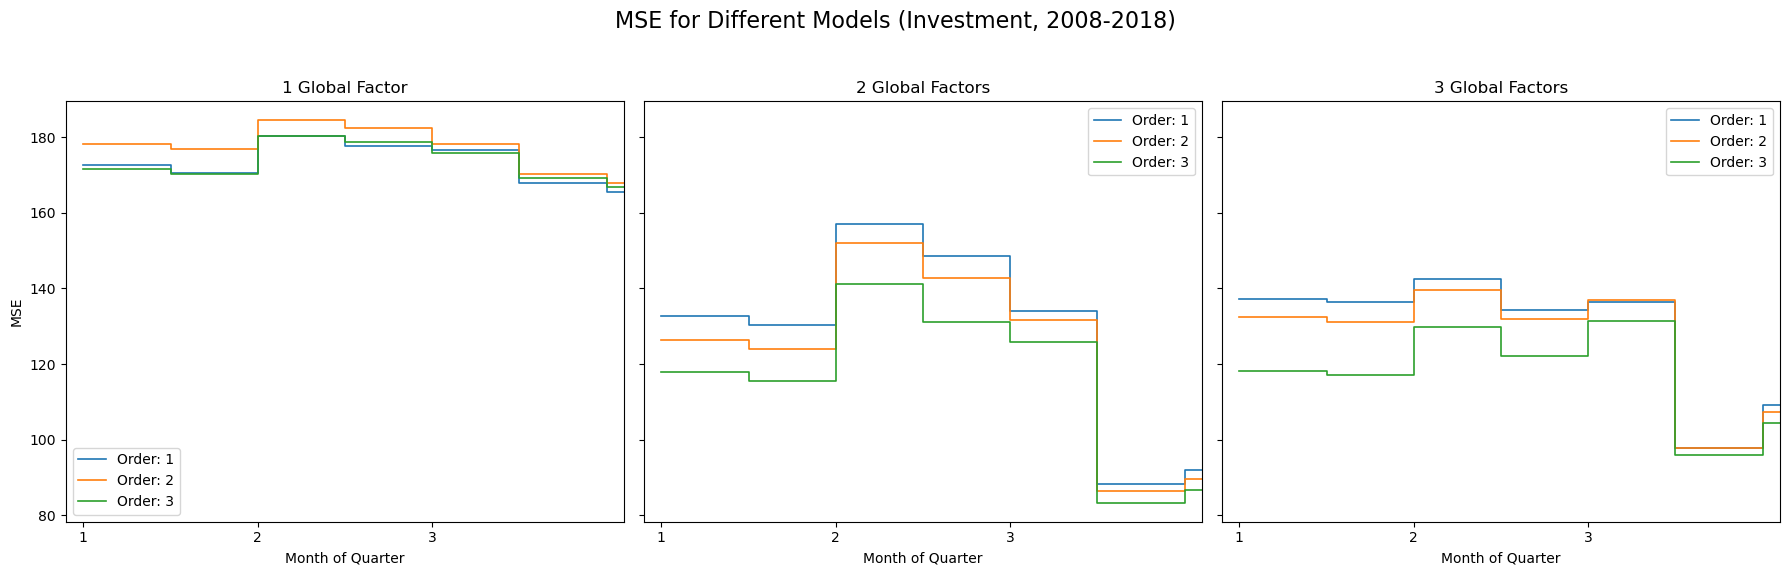

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]
q_var = 'Investment'  

# Define a mapping for each vintage to a numeric x-value
x_mapping = {
    "M1-01": 1.0,
    "M1-16": 1.5,
    "M2-01": 2.0,
    "M2-16": 2.5,
    "M3-01": 3.0,
    "M3-16": 3.5,
    "M4-01": 4.0
}

# Construct x values based on the vintages
x_values = [x_mapping[col] for col in vintage_col_names]
# Extend the x array so that the last step extends to the end of the x-axis
x_extended = x_values.copy()
x_extended.append(4.1)  # extend x-axis to 4.1

# Define the directory containing MSE files
mse_dir = f"../MSE/DFM_hard_surveys_global_factors_{q_var}_update"

# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop over each number of global factors (1, 2, and 3)
for i, num_factors in enumerate(range(1, 4)):
    ax = axs[i]
    # Within each subplot, loop over factor orders 1 to 3
    for order in range(1, 4):
        # Construct file name based on the model's parameters
        factors_str = f"Global_{num_factors}_{order}"
        mse_file_name = f"MSE_{q_var}_{factors_str}.csv"
        mse_file_path = os.path.join(mse_dir, mse_file_name)
        
        # Load the MSE values from file
        mse_df = pd.read_csv(mse_file_path)
        # Construct y values based on the vintages
        y_values = [mse_df[col].iloc[0] for col in vintage_col_names]
        
        # Extend the y-values so the step function holds the last value
        y_extended = y_values.copy()
        y_extended.append(y_values[-1]) # Repeat the last value
        
        # Plot the step function for the current model
        ax.step(x_extended, y_extended, where='post', linewidth=1.2, 
                 label=f"Order: {order}")
        
    # Customize the subplot
    ax.set_xlabel("Month of Quarter")
    # Set ticks only at 1, 2, and 3 to mark the beginning of each month
    ax.set_xticks([1, 2, 3])
    ax.set_xlim(0.9, 4.1)
    ax.set_title(f"{num_factors} Global Factor{'s' if num_factors > 1 else ''}")
    if i == 0:  # Only the leftmost subplot gets the y-axis label
        ax.set_ylabel("MSE")
    ax.legend()

plt.suptitle(f"MSE for Different Models ({q_var}, 2008-2018)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Create the "plots" directory if it doesn't exist and save the figure as PNG and EPS
os.makedirs(f"../plots/DFM_hard_surveys_global_factors_{q_var}_update", exist_ok=True)
base_filename = os.path.join(f"../plots/DFM_hard_surveys_global_factors_{q_var}_update", f"DFM_hard_surveys_global_factors_2008-2018_{q_var}")
plt.savefig(f"{base_filename}.png", format="png")
plt.savefig(f"{base_filename}.eps", format="eps")

plt.show()

Plot MSE values for all models evaluated over the 2008–2010 and 2011-2018 periods.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


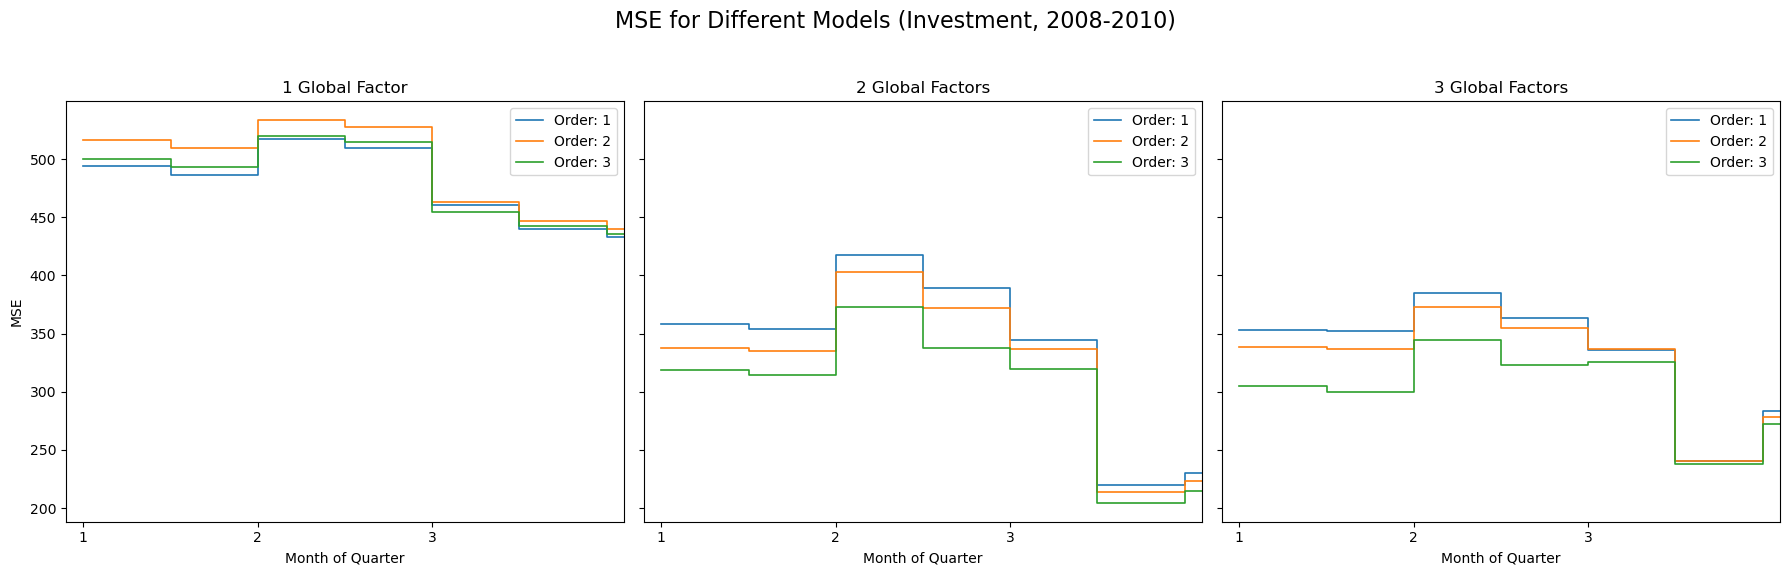

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


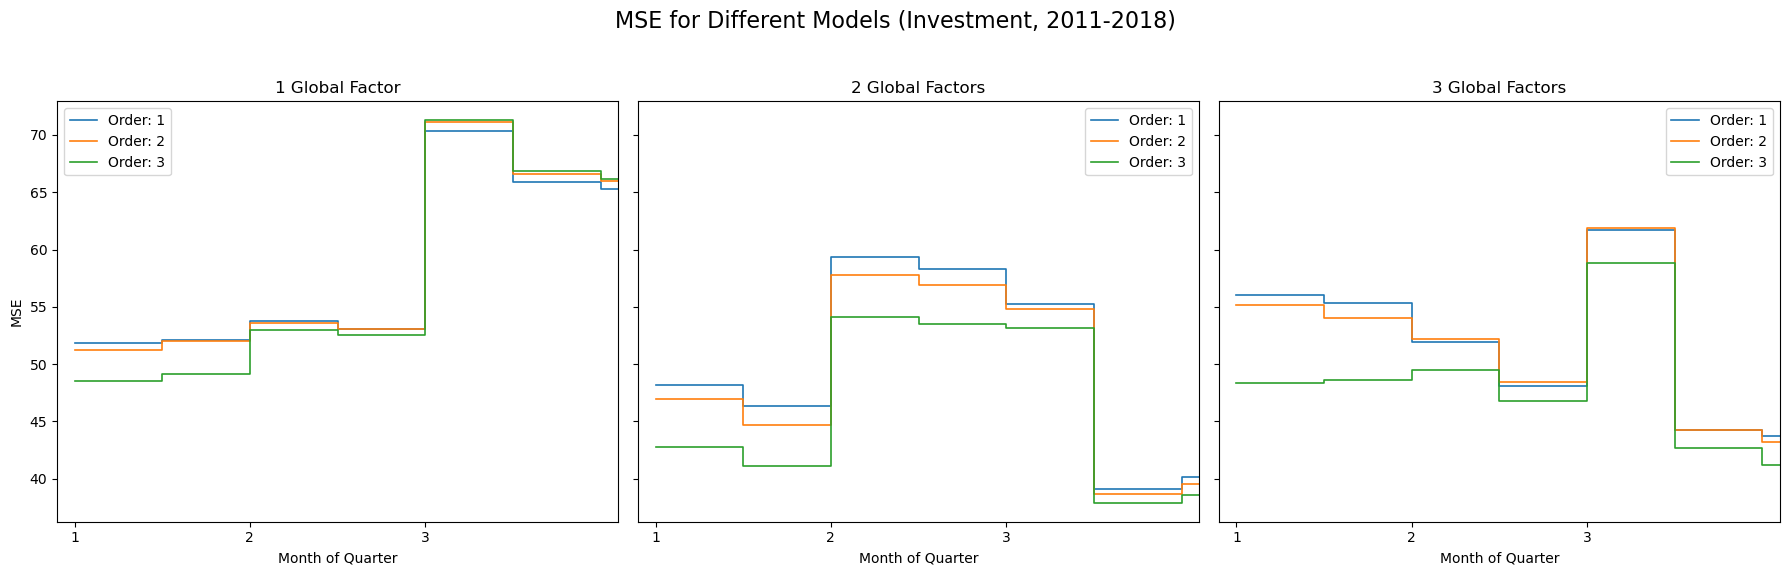

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def quarter_to_float(q_str):
    """
    Convert a string like 'YYYY-MM'
    into a float: e.g. 2008-03 -> 2008.00, 2008-06 -> 2008.25, etc.
    """
    year = int(q_str[:4])
    month = int(q_str[5:])
    # Map month to fraction of the year
    if month == 3:
        fraction = 0.00
    elif month == 6:
        fraction = 0.25
    elif month == 9:
        fraction = 0.50
    elif month == 12:
        fraction = 0.75
    return year + fraction

# Forecast variable and directories
q_var = 'Investment'
forecasts_dir = f"../forecasts/DFM_hard_surveys_global_factors_{q_var}_update"
actual_growth_file = f"../{q_var}_growth_actual_update.csv"

# Vintage columns
vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]

# Load actual growth data and convert 'date' to float
actual_growth = pd.read_csv(actual_growth_file)
actual_growth["date_float"] = actual_growth["date"].apply(quarter_to_float)
actual_growth.sort_values("date_float", inplace=True)

# Define two periods
periods = {
    "2008-2010": lambda df: df["date_float"] < 2011,
    "2011-2018": lambda df: df["date_float"] >= 2011
}

# Define a mapping for each vintage to a numeric x-value
x_mapping = {
    "M1-01": 1.0,
    "M1-16": 1.5,
    "M2-01": 2.0,
    "M2-16": 2.5,
    "M3-01": 3.0,
    "M3-16": 3.5,
    "M4-01": 4.0
}

# Construct x values based on the vintages
x_values = [x_mapping[col] for col in vintage_col_names]
# Extend the x array so that the last step extends to the end of the x-axis
x_extended = x_values.copy()
x_extended.append(4.1)  # extend x-axis to 4.1

# Loop over each period and create a separate figure
for period_label, period_filter in periods.items():
    
    # Create a figure with 1 row and 3 columns of subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    # Loop over each number of global factors (1, 2, and 3)
    for i, num_factors in enumerate(range(1, 4)):
        ax = axs[i]
        # Within each subplot, loop over factor orders 1 to 3
        for order in range(1, 4):
            # Construct forecast file name, e.g., "forecasts_Investment_Global_1_1.csv"
            factors_str = f"Global_{num_factors}_{order}"
            forecast_file_name = f"forecasts_{q_var}_{factors_str}.csv"
            forecast_file_path = os.path.join(forecasts_dir, forecast_file_name)
    
            # Load forecast data 
            forecasts = pd.read_csv(forecast_file_path, index_col=0)
            forecasts.index.name = "date"
            forecasts.reset_index(inplace=True)
            
            # Merge forecasts with actual growth 
            merged = pd.merge(forecasts, actual_growth, on="date", how="inner")
            merged["date_float"] = merged["date"].apply(quarter_to_float)
            merged.sort_values("date_float", inplace=True)
            
            # Filter merged data for the current period
            merged_period = merged[ period_filter(merged) ]
            
            # Calculate MSE for each vintage column over the filtered period
            mse_dict = {}
            for col in vintage_col_names:
                mse = ((merged_period[col] - merged_period["growth"]) ** 2).mean()
                mse_dict[col] = mse
                
            # Construct y values based on the vintages
            y_values = [mse_dict[col] for col in vintage_col_names]
            
            # Extend the y-values so the step function holds the last value
            y_extended = y_values.copy()
            y_extended.append(y_values[-1]) # Repeat the last value
            
            # Plot the step function for the current model (order)
            ax.step(x_extended, y_extended, where='post', linewidth=1.2, 
                    label=f"Order: {order}")
            
        # Customize the subplot
        ax.set_xlabel("Month of Quarter")
        # Set ticks only at 1, 2, and 3 to mark the beginning of each month
        ax.set_xticks([1, 2, 3])
        ax.set_xlim(0.9, 4.1)
        ax.set_title(f"{num_factors} Global Factor{'s' if num_factors > 1 else ''}")
        if i == 0:  # Only the leftmost subplot gets the y-axis label
            ax.set_ylabel("MSE")
        ax.legend()
   
    plt.suptitle(f"MSE for Different Models ({q_var}, {period_label})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Create the "plots" directory if it doesn't exist and save the figure as PNG and EPS
    os.makedirs(f"../plots/DFM_hard_surveys_global_factors_{q_var}_update", exist_ok=True)
    base_filename = os.path.join(f"../plots/DFM_hard_surveys_global_factors_{q_var}_update", f"DFM_hard_surveys_global_factors_{period_label}_{q_var}")
    plt.savefig(f"{base_filename}.png", format="png")
    plt.savefig(f"{base_filename}.eps", format="eps")

    plt.show()

Plot forecasts vs actual growth values for all models and different time periods (2008-2010, 2008-2018, and 2011-2018).

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


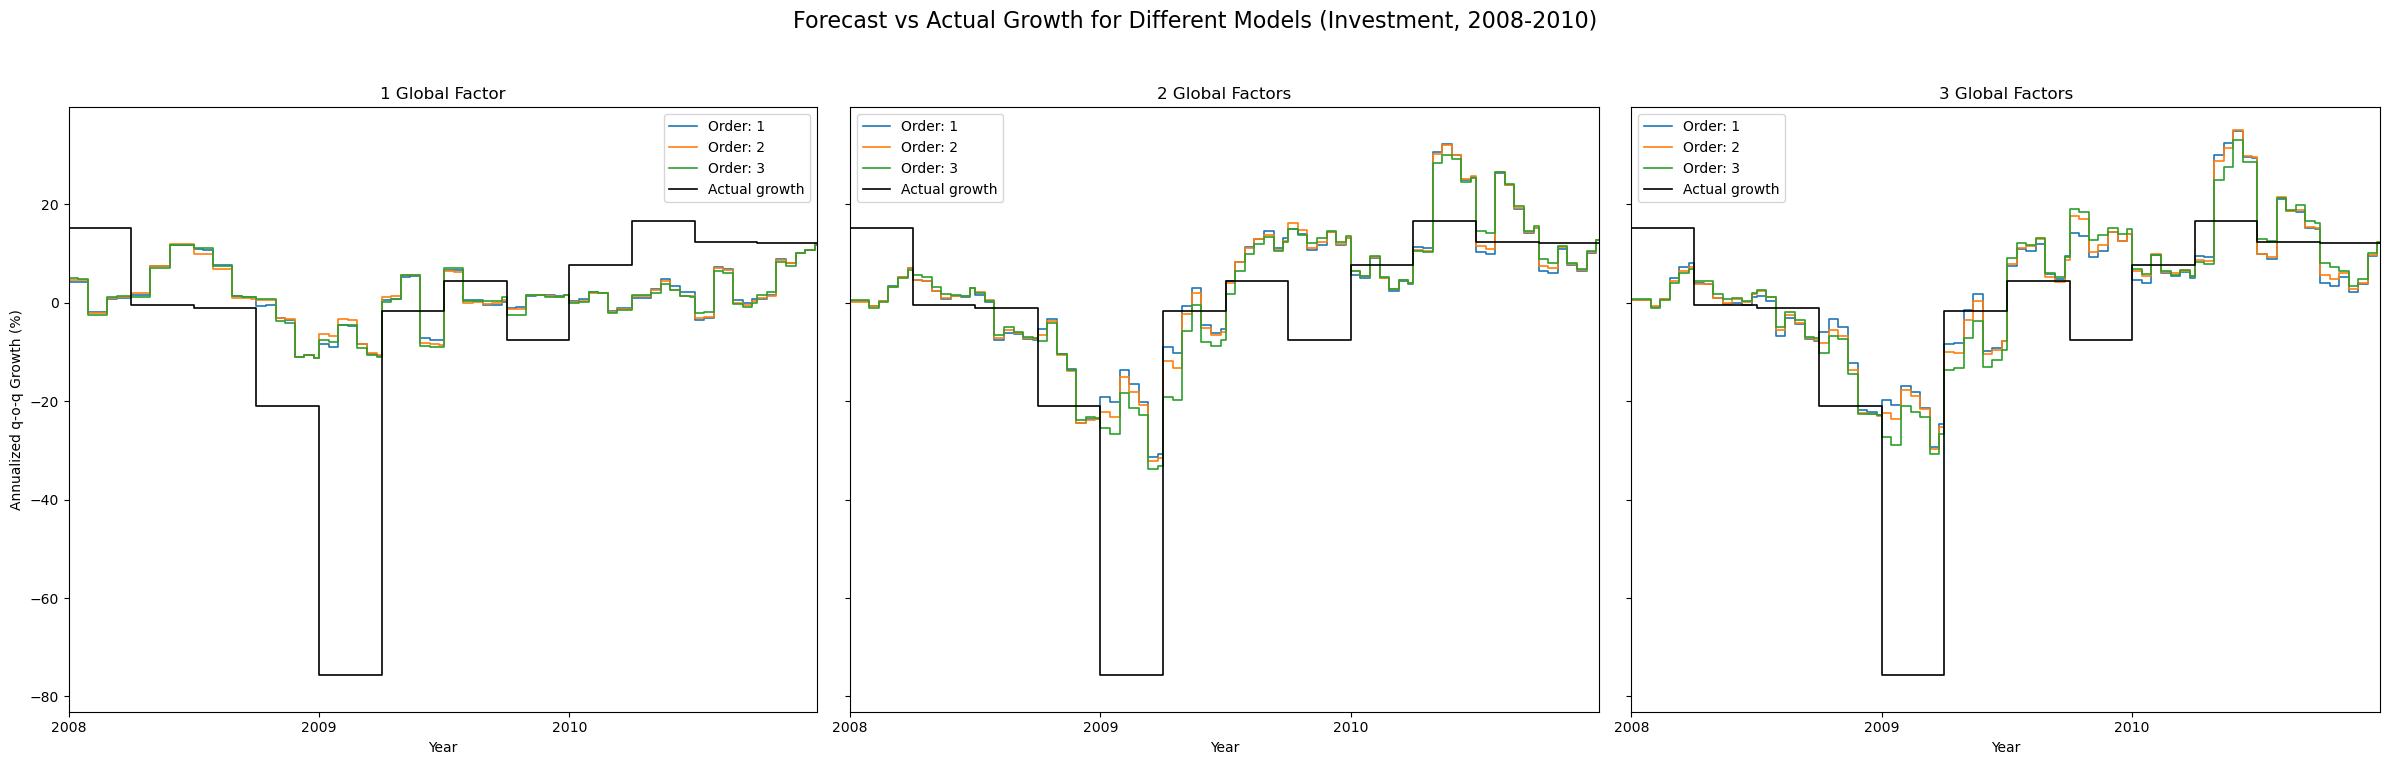

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


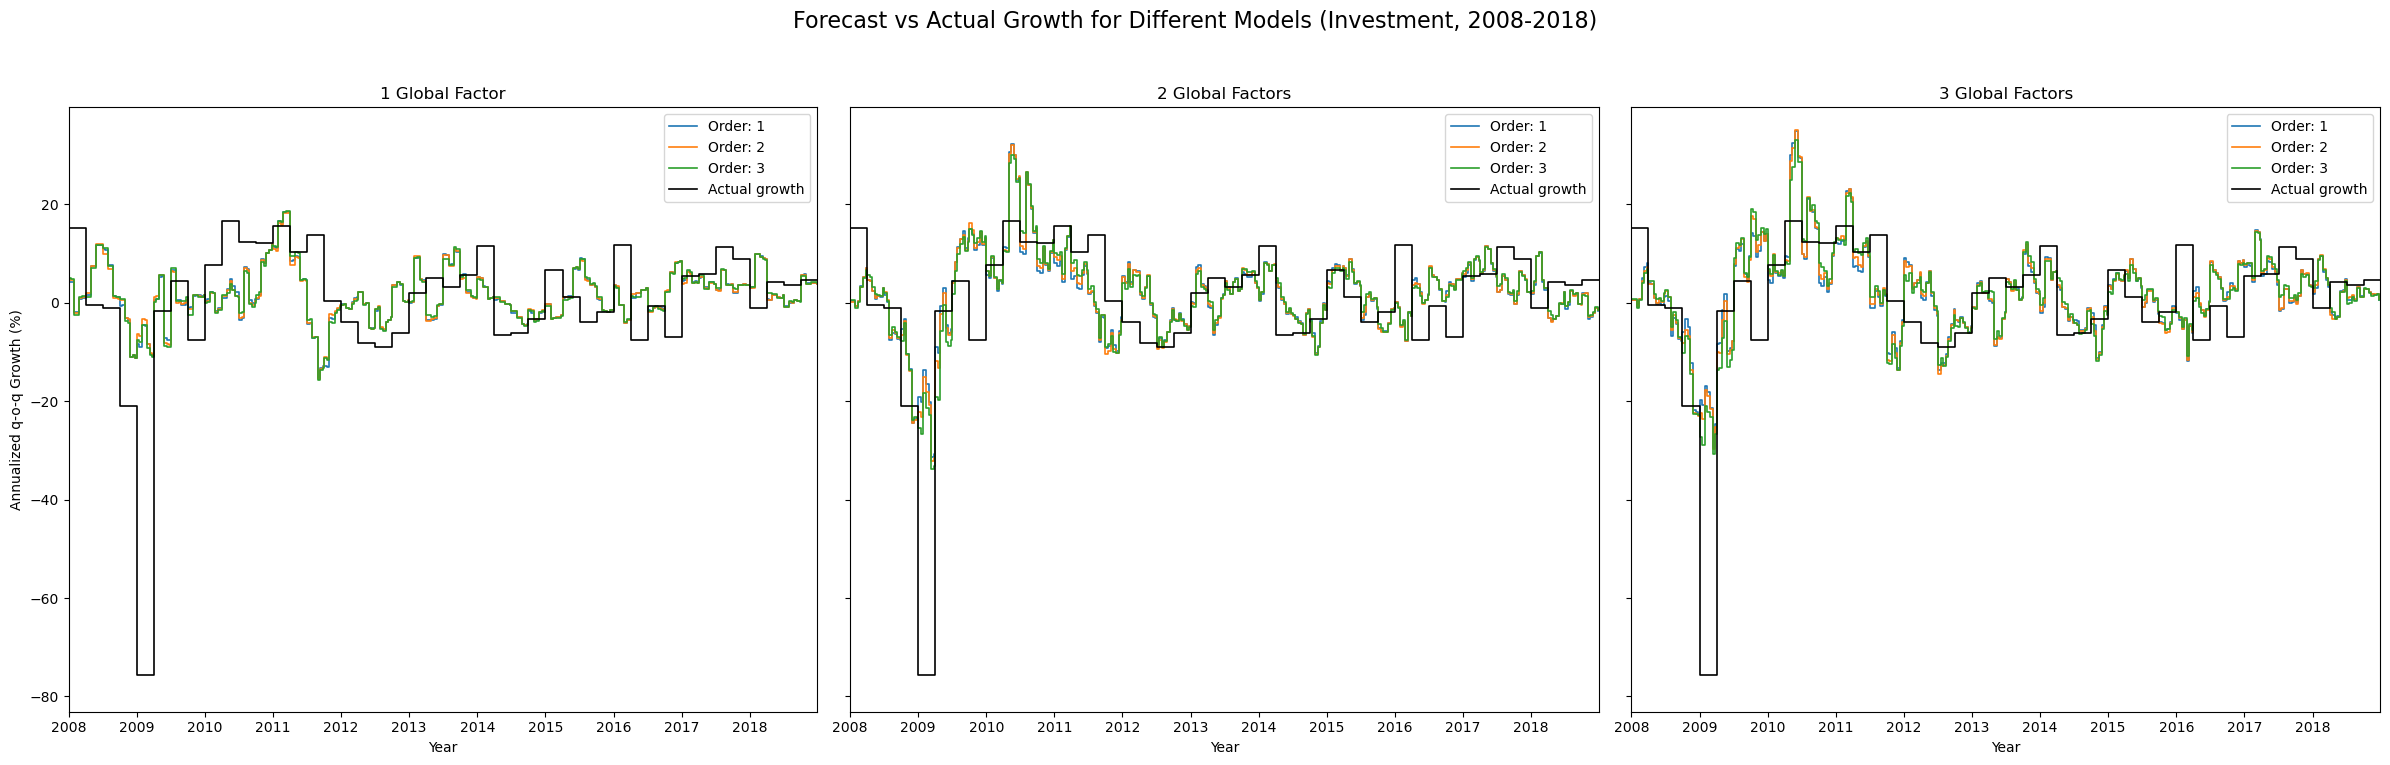

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


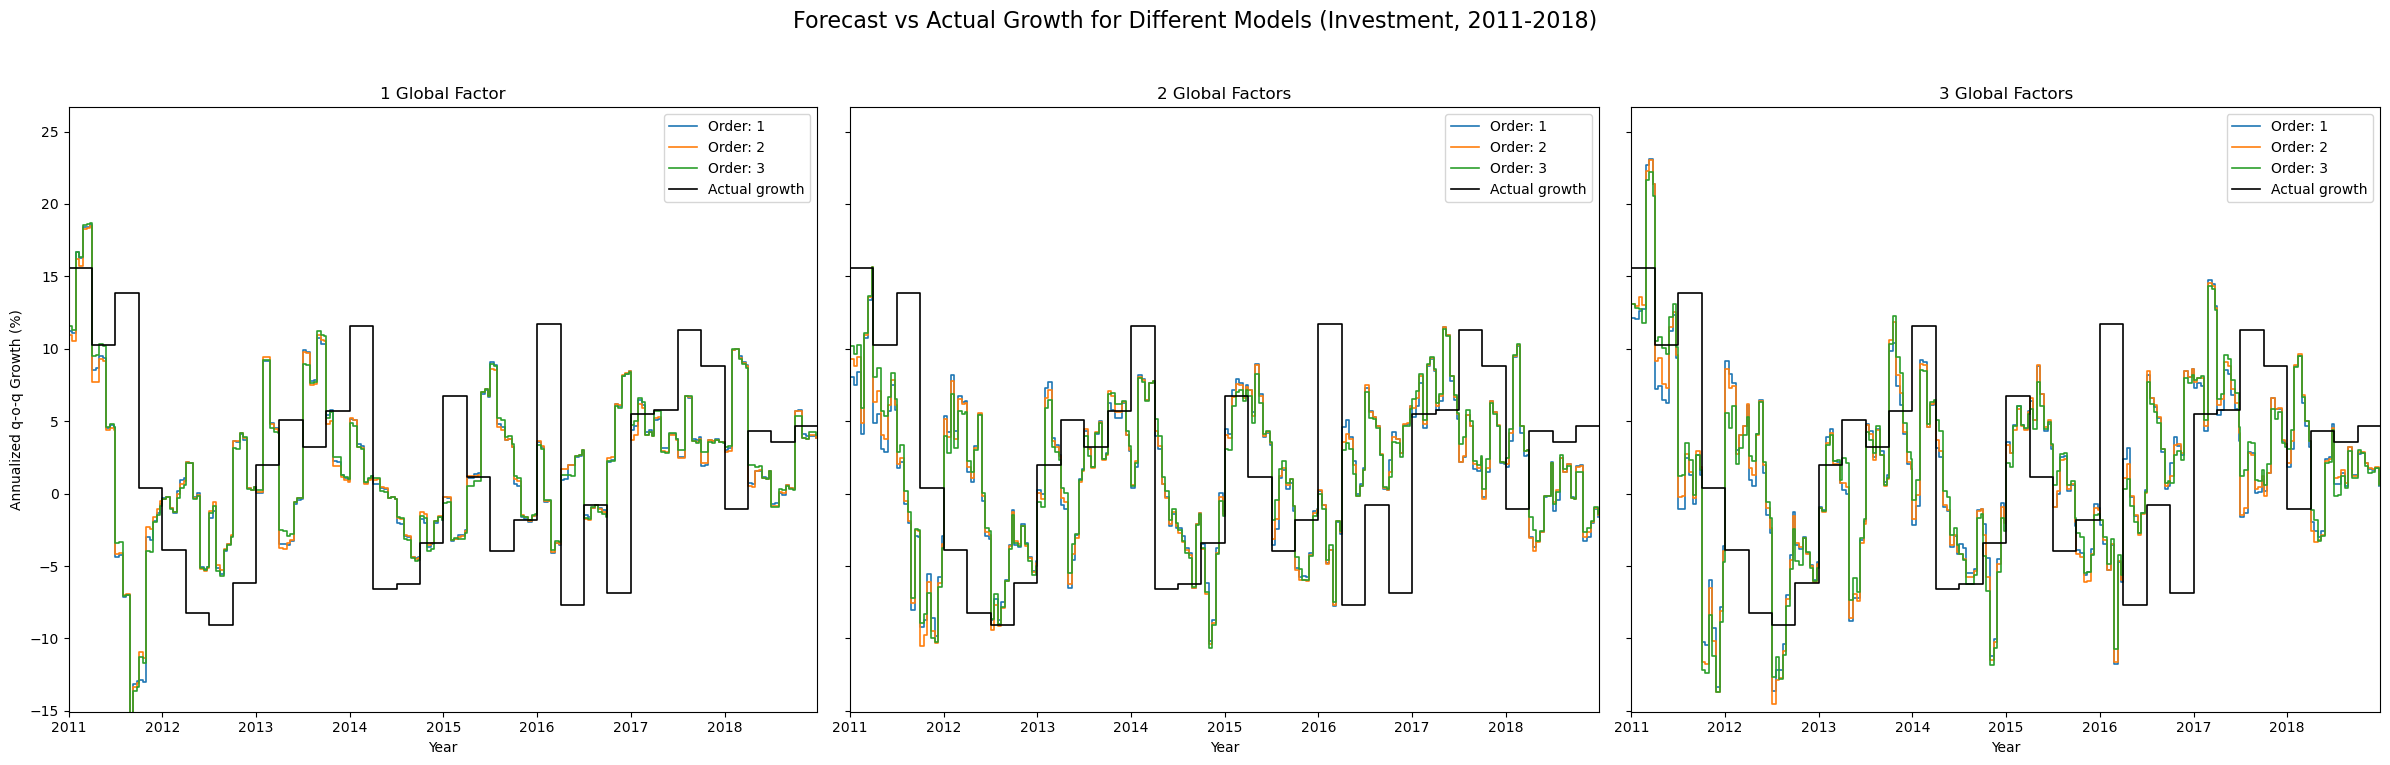

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert quarter strings like "2008-03" into a float (e.g. 2008.00 for Q1, 2008.25 for Q2, etc.)
def quarter_to_float(q_str):
    """
    Convert a string like 'YYYY-MM'
    into a float: e.g. 2008-03 -> 2008.00, 2008-06 -> 2008.25, etc.
    """
    year = int(q_str[:4])
    month = int(q_str[5:])
    # Map month to fraction of the year
    if month == 3:
        fraction = 0.00
    elif month == 6:
        fraction = 0.25
    elif month == 9:
        fraction = 0.50
    elif month == 12:
        fraction = 0.75
    return year + fraction

# Forecast variable and directories
q_var = 'Investment'
forecasts_dir = f"../forecasts/DFM_hard_surveys_global_factors_{q_var}_update"
actual_growth_file = f"../{q_var}_growth_actual_update.csv"

# Vintage columns
vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]

# Assign 7 small offsets within each quarter, so each quarter has 7 forecast points
offsets = np.linspace(0, 0.23, 7)

# Load actual growth data and convert 'date' to float
actual_growth = pd.read_csv(actual_growth_file)
actual_growth["date_float"] = actual_growth["date"].apply(quarter_to_float)
actual_growth.sort_values("date_float", inplace=True)

# Build x,y arrays for the actual growth
x_act = actual_growth["date_float"].tolist()
y_act = actual_growth["growth"].tolist()

# Define period configurations: x-axis limits and tick positions for each period
period_configs = {
    "2008-2010": {"xlim": (2008, 2010.99), "xticks": list(range(2008, 2011))},
    "2008-2018": {"xlim": (2008, 2018.99), "xticks": list(range(2008, 2019))},
    "2011-2018": {"xlim": (2011, 2018.99), "xticks": list(range(2011, 2019))}
}

# Loop over each period configuration to create and save separate plots
for period_label, config in period_configs.items():
    
    # Extend the actual growth arrays so that the step function continues until the end of the x-axis
    if period_label in ["2008-2018", "2011-2018"]:
        x_act_extended = x_act.copy()
        x_act_extended.append(config["xlim"][1])
        y_act_extended = y_act.copy()
        y_act_extended.append(y_act[-1])
    else:
        x_act_extended = x_act
        y_act_extended = y_act

    # Create a figure with 1 row and 3 columns for the three global factor counts
    fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

    # Loop over each global factor count (1, 2, and 3)
    for i, num_factors in enumerate([1, 2, 3]):
        ax = axs[i]

        # For each global factor count, plot forecasts for orders 1, 2, and 3
        for order in range(1, 4):

            # Construct forecast file name, e.g., "forecasts_Investment_Global_1_1.csv"
            factors_str = f"Global_{num_factors}_{order}"
            forecast_file_name = f"forecasts_{q_var}_{factors_str}.csv"
            forecast_file_path = os.path.join(forecasts_dir, forecast_file_name)

            # Load forecast data 
            forecasts = pd.read_csv(forecast_file_path, index_col=0)
            forecasts.index.name = "date"
            forecasts.reset_index(inplace=True)

            # Merge forecasts with actual growth dates
            merged = pd.merge(forecasts, actual_growth[['date']], on="date", how="inner")
            merged["date_float"] = merged["date"].apply(quarter_to_float)
            merged.sort_values("date_float", inplace=True)

            # Build forecast x and y arrays 
            x_fore = []
            y_fore = []
            for idx, row in merged.iterrows():
                base_x = row["date_float"]
                # For each of the 7 vintage columns, define an x-position and take that forecast value
                for j, col in enumerate(vintage_col_names):
                    x_fore.append(base_x + offsets[j])
                    y_fore.append(row[col])

            # Plot the forecast step curve for the current order
            ax.step(x_fore, y_fore, where='post', linewidth=1.2, label=f"Order: {order}")

        # Plot actual growth as a step plot in each subplot
        ax.step(x_act_extended, y_act_extended, where='post', color='black', linewidth=1.2, label="Actual growth")

        # Customize the subplot
        ax.set_xlabel("Year")
        ax.set_xlim(config["xlim"][0], config["xlim"][1])
        ax.set_xticks(config["xticks"])
        
        # Set y-axis limits based on the data within the period range
        x_min, x_max = config["xlim"]
        def filter_points(x_arr, y_arr, x_min, x_max):
            return [y for x, y in zip(x_arr, y_arr) if x_min <= x <= x_max]

        # Filter y-values
        y_filtered = filter_points(x_fore, y_fore, x_min, x_max)
        y_act_filtered = filter_points(x_act_extended, y_act_extended, x_min, x_max)
        
        # Combine all filtered y-values
        combined_y = y_filtered + y_act_filtered
        ax.set_ylim(1.1 * min(combined_y), 1.2 * max(combined_y))
        
        ax.set_title(f"{num_factors} Global Factor{'s' if num_factors > 1 else ''}")
        if i == 0:
            ax.set_ylabel("Annualized q-o-q Growth (%)")
        ax.legend()
        
    plt.suptitle(f"Forecast vs Actual Growth for Different Models ({q_var}, {period_label})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Create the "plots" directory if it doesn't exist and save the figure as PNG and EPS
    os.makedirs(f"../plots/DFM_hard_surveys_global_factors_{q_var}_update", exist_ok=True)
    base_filename = os.path.join(f"../plots/DFM_hard_surveys_global_factors_{q_var}_update", f"DFM_hard_surveys_global_factors_forecast_vs_actual_{period_label}_{q_var}")
    plt.savefig(f"{base_filename}.png", format="png")
    plt.savefig(f"{base_filename}.eps", format="eps")

    plt.show()